# Lab 7.05 - Time series analysis

In [118]:
# Package imports for data science
import numpy as np  # Scientific computing
import scipy.stats as stats  # Statistical tests
import pandas as pd  # Data Frame
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt  # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns  # Advanced data visualisation

### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [119]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv",
    delimiter=";",
    parse_dates=["Month"],
).set_index(["Month"])


data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


<Axes: xlabel='Month'>

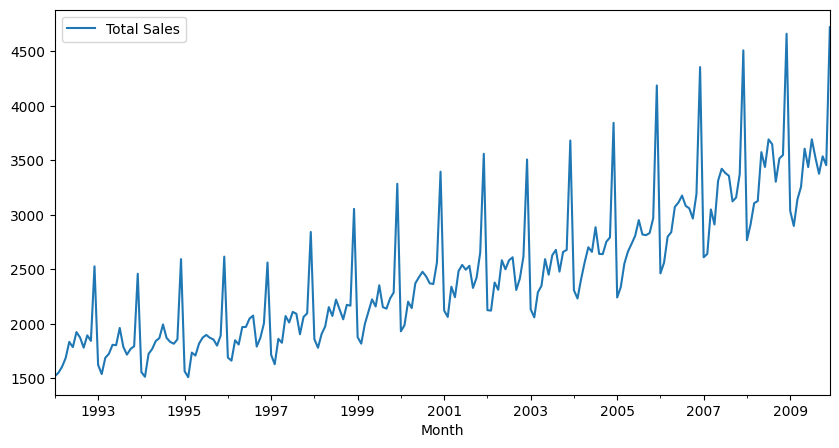

In [120]:
data.plot(y="Total Sales", figsize=[10, 5])

In [121]:
train = data["Total Sales"][:"2008-12-01"]
test = data["Total Sales"]["2009-01-01":]

Text(0.5, 1.0, 'Train, test, fitted & predicted values using Holt-Winters')

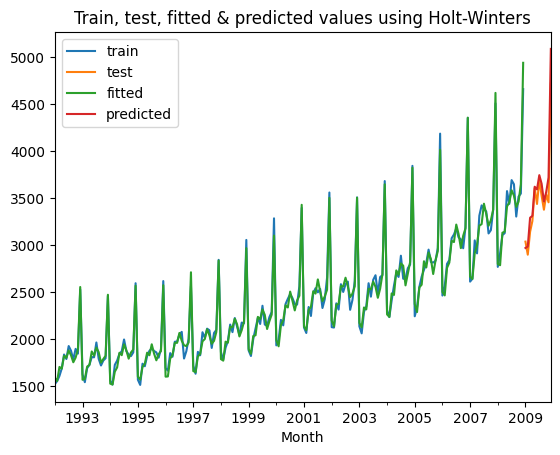

In [123]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Create model
sales_model = ExponentialSmoothing(
    train, trend="add", seasonal="mul", seasonal_periods=12, freq="MS"
).fit()

# Plot train
train.plot(legend=True, label="train")
# Plot test
test.plot(legend=True, label="test")
# Plot fitted
sales_model.fittedvalues.plot(legend=True, label="fitted")
# Predicted
sales_predicted = sales_model.forecast(12)
sales_predicted.plot(legend=True, label="predicted")

plt.title("Train, test, fitted & predicted values using Holt-Winters")

## Source
Business Analytics Data Analysis & Decision Making 